In [2]:
DATASET_FILE_1M20PHS = "./dataset/1m20phs.csv"

[32, 16, 64]


AttributeError: 'Axes' object has no attribute 'savefig'

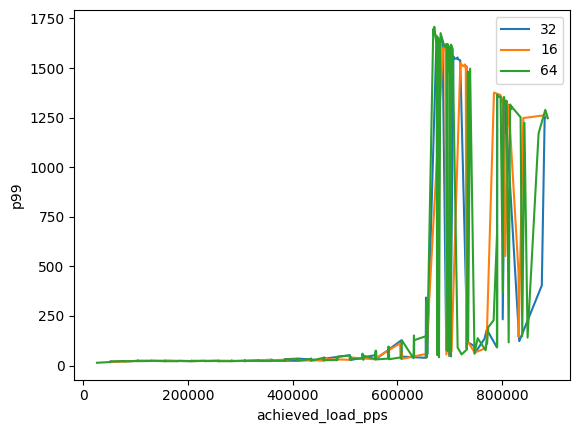

In [2]:
from utils import *
from graphing_tools import *

DATASET_FILE_1M20PHS = "./dataset/1m20phs.csv"
dataset_dataframe = read_pandas_dataset(DATASET_FILE_1M20PHS)
segment_sizes = get_segment_sizes(dataset_dataframe)
system_names = get_system_names(dataset_dataframe)

vanilla_cornflakes_dict = {}
print(segment_sizes)
for seg_size in segment_sizes:
    seg_df = get_tp_lat_graph_entities(dataset_dataframe, seg_size, 'zcc_cornflakes_mfu')
    vanilla_cornflakes_dict[seg_size] = seg_df

plot_segment_interim(vanilla_cornflakes_dict, segment_sizes, 'zcc_cornflakes_mfu')


In [2]:
from utils import *
from graphing_tools import *

DATASET_FILE_1M20PHS = "./dataset/1m20phs.csv"
dataset_dataframe = read_pandas_dataset(DATASET_FILE_1M20PHS)
segment_sizes = get_segment_sizes(dataset_dataframe)
system_names = get_system_names(dataset_dataframe)
pinning_limit = get_pinning_limits(dataset_dataframe, 'zcc_cornflakes_mfu', 32)
print(pinning_limit)
vanilla_cornflakes_dict = {}
print(segment_sizes)
for pin_limit in pinning_limit:
    for seg_size in segment_sizes:
        seg_df = get_tp_lat_graph_entities_mfu(dataset_dataframe, seg_size, pin_limit, 'zcc_cornflakes_mfu')
        vanilla_cornflakes_dict[f'{seg_size}_{pin_limit}'] = seg_df

# plot_segment_interim(vanilla_cornflakes_dict, segment_sizes, 'zcc_cornflakes_mfu')


[1024, 512, 256, 128, 64]
[32, 16, 64]


[1024, 512, 256, 128, 64]
[32, 16, 64]


AttributeError: 'Axes' object has no attribute 'savefig'

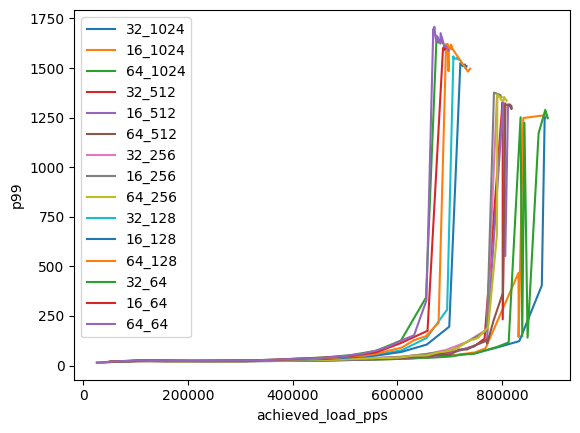

In [4]:
from utils import *
from graphing_tools import *

DATASET_FILE_1M20PHS = "./dataset/1m20phs.csv"
dataset_dataframe = read_pandas_dataset(DATASET_FILE_1M20PHS)
segment_sizes = get_segment_sizes(dataset_dataframe)
system_names = get_system_names(dataset_dataframe)
pinning_limit = get_pinning_limits(dataset_dataframe, 'zcc_cornflakes_mfu', 32)
print(pinning_limit)
zcc_mfu_dict = {}
print(segment_sizes)
for pin_limit in pinning_limit:
    for seg_size in segment_sizes:
        seg_df = get_tp_lat_graph_entities_mfu(dataset_dataframe, seg_size, pin_limit, 'zcc_cornflakes_mfu')
        zcc_mfu_dict[f'{seg_size}_{pin_limit}'] = seg_df

plot_segment_interim(zcc_mfu_dict, 32, 'zcc_cornflakes_mfu')
